In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import sys
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from d2v_func import *



In [3]:
model= Doc2Vec.load('../D2V_models/d2v.model')

In [4]:
sample_df = pd.read_csv('../Archive_CSV/sample_df_for_training.csv',index_col=0)


In [16]:
full_df = pd.read_csv('../Archive_CSV/ALL_rows_scraped.csv', index_col=0)

In [17]:
full_df

,author,content,description,label,publishedAt,source_id,source_name,title,url,urlToImage,text,neg,neu,pos,compound,subjectivity
0,Richard Brookhiser,While the nation was following the Kavanaugh h...,What I learned about politics and the Supreme ...,right,2018-09-05T15:22:19Z,national-review,National Review,Politics and the Supreme Court,https://www.nationalreview.com/corner/politics...,https://i1.wp.com/www.nationalreview.com/wp-co...,National Review While the nation was following...,0.072,0.769,0.159,0.9947,0.489867
1,Steven J. Duffield,"Former Senator Jon Kyl (R, Ariz.) leads a news...","He is from a different era, figuratively and l...",right,2018-09-05T16:20:17Z,national-review,National Review,Three Cheers for Jon Kyl’s Return,https://www.nationalreview.com/2018/09/jon-kyl...,https://i2.wp.com/www.nationalreview.com/wp-co...,National Review \n\n\t\t\t\t\t\t\t\tStrangers ...,0.078,0.790,0.132,0.9925,0.527833
2,Mairead McArdle,Supreme Court nominee Judge Brett Kavanaugh on...,Under intense questioning from Sen. Dianne Fei...,right,2018-09-05T18:21:10Z,national-review,National Review,Kavanaugh: Roe Is ‘Important Precedent of the ...,https://www.nationalreview.com/news/brett-kava...,https://i1.wp.com/www.nationalreview.com/wp-co...,National Review Judge Brett Kavanaugh faced hi...,0.039,0.879,0.083,0.9661,0.552170
3,Jack Crowe,President Donald Trump holds a meeting with Re...,A high-ranking Trump administration official d...,right,2018-09-05T20:31:59Z,national-review,National Review,Anonymous Official in NYT Op-Ed: I’m Working t...,https://www.nationalreview.com/news/anonymous-...,https://i0.wp.com/www.nationalreview.com/wp-co...,National Review In an unsigned op-ed published...,0.151,0.772,0.077,-0.9934,0.500336
4,NR Staff,"Sen. Ted Cruz (R, Texas) speaks during a Senat...",Republican senators give instructive opening s...,right,2018-09-05T19:05:23Z,national-review,National Review,Republican Senators Give Admirable Opening Sta...,https://www.nationalreview.com/corner/republic...,https://i2.wp.com/www.nationalreview.com/wp-co...,National Review Several Republican senators of...,0.057,0.824,0.119,0.9999,0.465750
5,George Will,U.S. Senate candidate Mike Espy speaks during ...,Democrat Mike Espy has a chance at winning in ...,right,2018-09-06T10:30:12Z,national-review,National Review,Mississippi’s Senate Race Tells an American Story,https://www.nationalreview.com/2018/09/mike-es...,https://i0.wp.com/www.nationalreview.com/wp-co...,National Review \n\n\t\t\t\t\t\t\t\tAnother Da...,0.045,0.868,0.087,0.9928,0.339220
6,Madeleine Kearns,Signs at a protest against President Trump’s t...,Peer pressure may play a role in ‘rapid-onset ...,right,2018-09-06T10:30:17Z,national-review,National Review,Why Did Brown University Bow to Trans Activists?,https://www.nationalreview.com/2018/09/brown-u...,https://i2.wp.com/www.nationalreview.com/wp-co...,National Review \n\n\t\t\t\t\t\t\t\tClosure of...,0.093,0.840,0.067,-0.9861,0.474293
7,Jay Nordlinger,T he airport here is undergoing some serious r...,"A look at the ’Cuse, in a New York state of mind.",right,2018-09-06T10:30:23Z,national-review,National Review,Syracuse Journal,https://www.nationalreview.com/2018/09/syracus...,https://i2.wp.com/www.nationalreview.com/wp-co...,National Review \n\n\t\t\t\t\t\t\t\tSwaggering...,0.049,0.767,0.184,0.9998,0.533412
8,Jonathan S. Tobin,"Sen. Kamala Harris (D, Calif.) speaks during S...",Some of the 2020 presidential contenders compe...,right,2018-09-06T18:00:09Z,national-review,National Review,Kamala Harris Wins the Democrats’ Kavanaugh Pr...,https://www.nationalreview.com/2018/09/kamala-...,https://i2.wp.com/www.nationalreview.com/wp-co...,National Review \n\n\t\t\t\t\t\t\t\tAnother Da...,0.085,0.829,0.086,0.8599,0.493072
9,Mairead McArdle,Pope Francis presides over evening prayers at ...,"According to the Associate Press, Attorney Gen...",right,2018-09-06T19:21:06Z,national-review,National Review,Report: New York AG Subpoenas State’s Dioceses...,https://w

In [9]:
sample_df.groupby(['label']).size()

label
center    1667
left      1569
right     1764
dtype: int64

In [10]:
sample_df.groupby(['source_name']).size()

source_name
Associated Press             318
Breitbart News               408
CNN                          383
Daily Mail                   400
Fox News                     400
MSNBC                        400
National Review              407
Reuters                      416
The American Conservative    149
The Economist                414
The New York Times           417
The Wall Street Journal       19
The Washington Times          83
Time                         386
Vice News                    400
dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(sample_df.text, sample_df.label)

In [12]:
train_vecs_dbow = get_all_vectors(model, X_train, 100, sample_df)
test_vecs_dbow = get_all_vectors(model, X_test, 100, sample_df)

def fit_logistic_reg(train_vecs, test_vecs, y_train, y_test):
    clf = LogisticRegression()
    clf.fit(train_vecs, y_train)
    print('Test Set Accuracy: '+str((clf.score(test_vecs, y_test))))
    return clf
#     y_hat_test = clf.predict(test_vecs_dbow)

In [47]:
clf = fit_logistic_reg(train_vecs_dbow,test_vecs_dbow, y_train, y_test)

Test Set Accuracy: 0.992


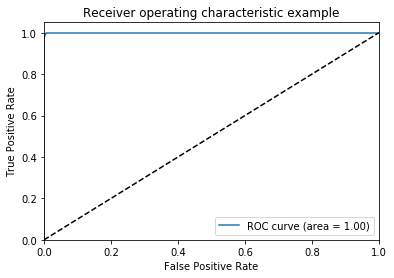

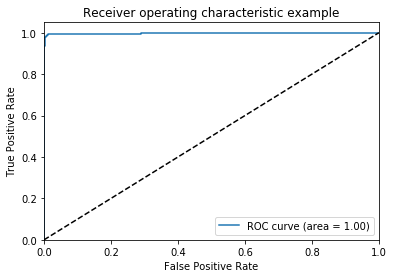

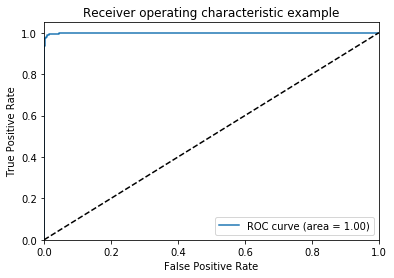

In [15]:
n_classes = 3
y = label_binarize(sample_df.label, classes=['right','left','center'])
X_train, X_test, y_train, y_test = train_test_split(sample_df.text, y)
train_vecs_dbow = get_all_vectors(model, X_train, 100, sample_df)
test_vecs_dbow = get_all_vectors(model, X_test, 100, sample_df)


vrest = OneVsRestClassifier(LogisticRegression())
y_score = vrest.fit(train_vecs_dbow, y_train).decision_function(test_vecs_dbow)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()